# Project 2
Michael Gankhuyag


Identify a large 2-node network. Your data should consist of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method (ex. island method)
What can you infer about each of the distinct groups?

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
import networkx.algorithms.bipartite as bi
import os
import numpy
import csv
import math
from collections import Counter

In this Project, I found a 2-mode crime data that was very appealing to me. The data includes a matrix of individuals by involvement in crime events in the 1990s. 

Background: In the 1990s Rick Rosenfeld and Norm White used police records to collect data on crime in St. Louis. They began with five homicides and recorded the names of all the individuals who had been involved as victims, suspects or witnesses. They then explored the files and recorded all the other crimes in which those same individuals appeared. This snowball process was continued until they had data on 557 crime events. Those events involved 870 participants of which: 569 appeared as victims 682 appeared as suspects 195 appeared as witnesses, and 41 were dual (they were recorded both as victims and suspects in the same crime. Their data appear, then, as an 870 by 557, individual by crime event matrix. 

In [6]:
os.chdir(r'C:\Users\User\Desktop\MSDS\DATA620\moreno_crime')

In [7]:
#Read the data
a = pd.read_csv('moreno_crime.csv')

In [8]:
a = a.rename(columns = {'1':'individual','1.1':'crime'})

In [9]:
#figure out weight
c=Counter(a['individual'])
weight = list(c.values())
key = list(c.keys())
weights = pd.DataFrame(weight,key).reset_index()
weights = weights.rename(columns = {'index':'individual',0:'weight'})

In [60]:
#Find Roles for reach individual
a['role'] = pd.read_csv('role.csv', header = None)

In [14]:
a2 = a
a2['weight'] = a.groupby(['individual'])['role'].transform('count')
a2.head()

,individual,crime,role,weight
0,1,2,Suspect,3
1,1,3,Victim,3
2,1,4,Victim,3
3,2,5,Suspect,22
4,2,6,Victim,22


In [22]:
G = nx.from_pandas_edgelist(a2,'individual','crime', 'weight', create_using =nx.DiGraph())

In [23]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 829
Number of edges: 1475
Average in degree:   1.7793
Average out degree:   1.7793


In [24]:
#Obtain closeness, betweenness and degree for each node
df = pd.DataFrame()
df['Individuals'] = list(G)
df['closeness'] = nx.closeness_centrality(G).values()
df['betweenness'] = nx.betweenness_centrality(G).values()
df['degree'] = nx.degree_centrality(G).values()

In [25]:
closeness = df.sort_values('closeness',ascending = False).reset_index(drop=True)
closeness.head()

,Individuals,closeness,betweenness,degree
0,39,0.147747,0.134341,0.015700
1,22,0.136980,0.158660,0.007246
2,225,0.135151,0.064949,0.013285
3,28,0.131147,0.015035,0.010870
4,43,0.130430,0.053609,0.016908


In [26]:
betweenness = df.sort_values('betweenness',ascending = False).reset_index(drop=True)
betweenness.head()

,Individuals,closeness,betweenness,degree
0,152,0.118383,0.208995,0.012077
1,220,0.106075,0.176894,0.022947
2,22,0.136980,0.158660,0.007246
3,54,0.120694,0.158445,0.007246
4,94,0.109829,0.152952,0.007246


In [27]:
degree = df.sort_values('degree',ascending = False).reset_index(drop=True)
degree.head()

,Individuals,closeness,betweenness,degree
0,815,0.000000,0.000000,0.030193
1,2,0.002717,0.001773,0.028986
2,425,0.048384,0.018139,0.026570
3,56,0.093696,0.058023,0.024155
4,220,0.106075,0.176894,0.022947


In [29]:
G = nx.Graph()

for i in range(len(a2)):
    G.add_node(a2.iloc[i][0],
              role = a2.iloc[i][2],
              weight = a2.iloc[i][3],
              bipartite =1)

In [30]:
for i in range(len(a2)): 
    G.add_node(a2.iloc[i][1],
                bipartite=0)

In [31]:
# add edges
for i in range(len(a2)):
    G.add_edge(a2.iloc[i][0], a2.iloc[i][1], weight=1)

In [32]:
# Seperate top_nodes for the indivduals and bottom_nodesfor the crimes
top_nodes = set(n for n,d in G.nodes(data=True) if d['bipartite']==1)
bottom_nodes = set(G) - top_nodes

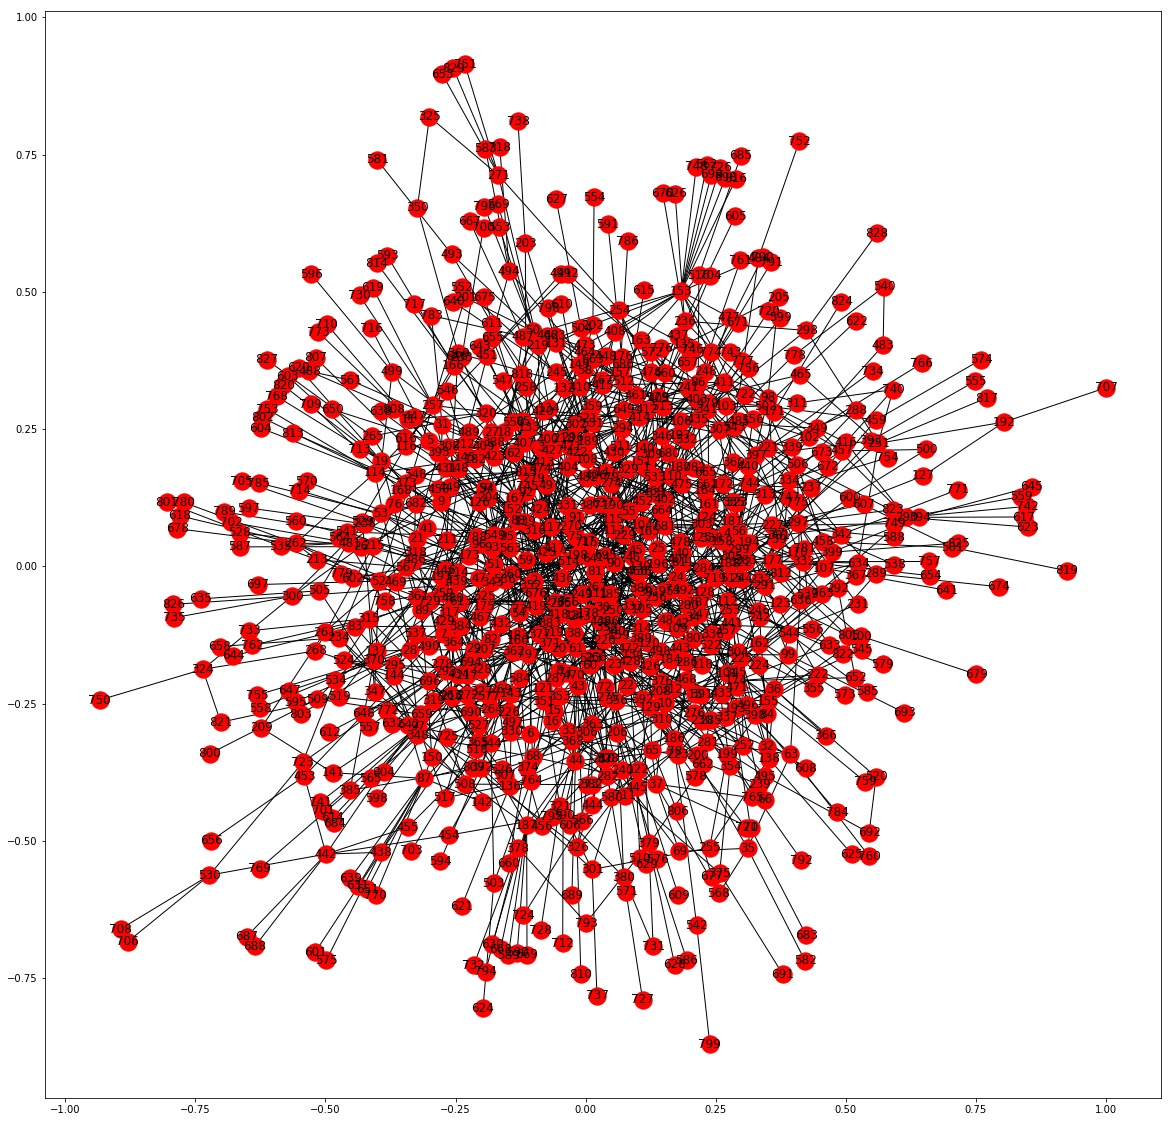

In [34]:
#Initial Chart of the social network analysis
plt.figure(figsize = (20,20))
nx.draw_networkx(G)

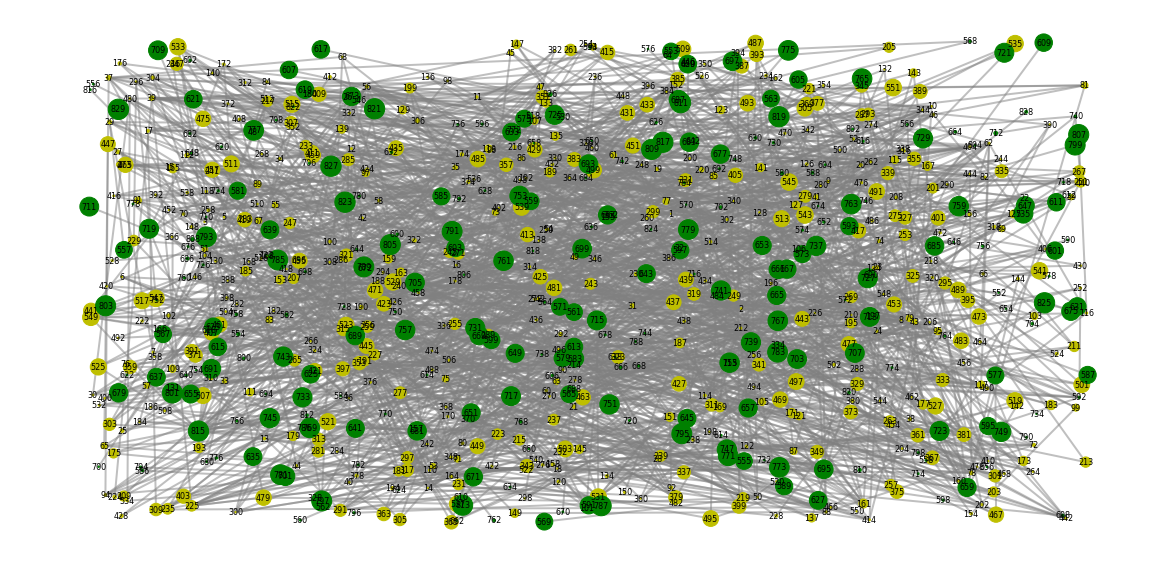

In [43]:
#plot the overall network
pos=nx.random_layout(G) # positions for all nodes


colors=[]
for n in list(G):
    if n in list(top_nodes):
        colors.append('g')
    else:
        colors.append('y')

# nodes
d = G.degree()
nx.draw_networkx_nodes(G,pos, node_color=colors, node_size=[v for v in list(d)], alpha=1)

# edges
nx.draw_networkx_edges(G,pos, width=2,alpha=0.5,edge_color='grey',style='solid')
#nx.draw_networkx_edges(G2,pos,edgelist=esmall, width=2,alpha=0.2,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.show()

As you can see from the initital chart, there is some serious connection between the crimes and the individuals involved. Next step is to trim the data so we can see who are the big players or victims of a bigger crime.

In [48]:
crime = a[a['weight'] > 10]

In [54]:
G = nx.Graph()

for i in range(len(crime)):
    G.add_node(crime.iloc[i][0],
              role = crime.iloc[i][2],
              weight =crime.iloc[i][3],
              bipartite =1)
    
for i in range(len(crime)): 
    G.add_node(crime.iloc[i][1],
                bipartite=0)
    
    
# add edges
for i in range(len(crime)):
    G.add_edge(crime.iloc[i][0], crime.iloc[i][1], weight=1)

In [55]:
# Seperate top_nodes for the indivduals and bottom_nodesfor the crimes
top_nodes = set(n for n,d in G.nodes(data=True) if d['bipartite']==1)
bottom_nodes = set(G) - top_nodes

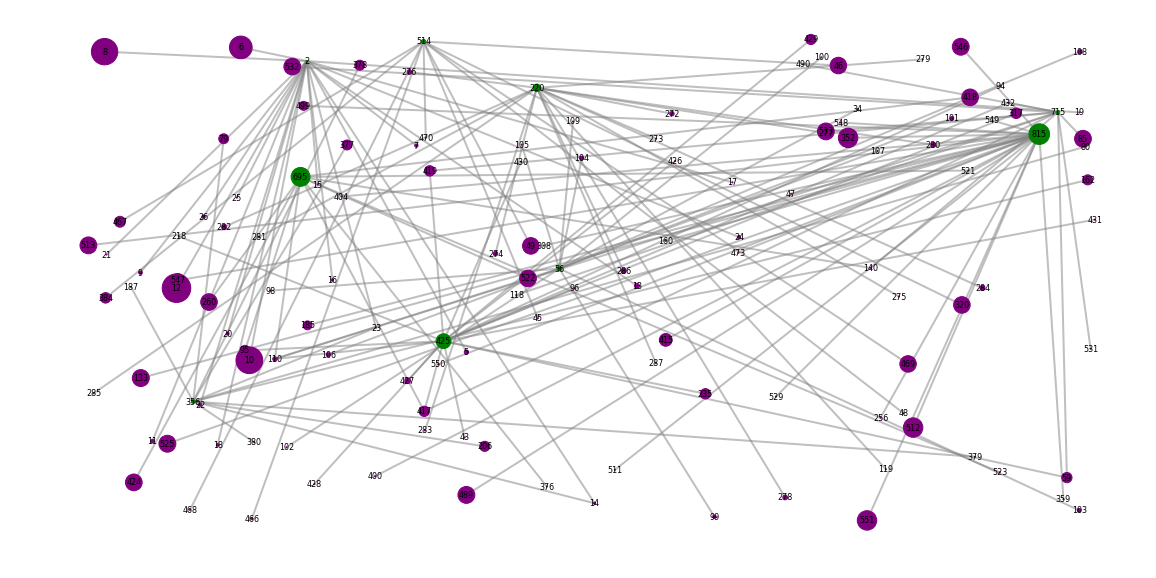

In [57]:
#plot the  network
pos=nx.random_layout(G) # positions for all nodes


colors=[]
for n in list(G):
    if n in list(top_nodes):
        colors.append('green')
    else:
        colors.append('purple')

# nodes
d = G.degree()
nx.draw_networkx_nodes(G,pos, node_color=colors, node_size=[v for v in list(d)], alpha=1)

# edges
nx.draw_networkx_edges(G,pos, width=2,alpha=0.5,edge_color='grey',style='solid')
#nx.draw_networkx_edges(G2,pos,edgelist=esmall, width=2,alpha=0.2,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off')
plt.show()

From the trimmed data, several individuals standout that seem to be connected to many of the crimes in the dataset. Based on the seriousness of the crime, I am curioius to see if there is a organized crime happening. If we look closer, what's interesting is that individuals 695, 815, and 425 seem to be a bottlenecks to individuals 56. Individuals 220,514, 356 and 715 also look suspcious based on the connection to the individuals with nodes with. 